# BT ôn thi Cuối kỳ Xác suất trong Khoa học dữ liệu
## Khoa CNTT - trường ĐH Công nghiệp TPHCM.
### Thời gian làm bài: 105 phút, SV được dùng tài liệu.

In [1]:
import numpy as np
import sympy as sp


### Bài 1. (phân bố kết hợp rời rạc)
Cho vector ngẫu nhiên liên tục $(X,Y)$ như bảng bên dưới. Hãy trả lời các câu hỏi sau

|X \ Y     | 2    | 3      | 
|----------|------|--------|
| 1        | 0.1  | 0.1    |
| 2        | 0.25 | 0.05   |
| 4        | 0.15 | 0.35   |

- **a)** Tính các phân phối lề theo từng biến. <br>
- **b)** Tính xác suất có điều kiện $P(0.5 < X < 3.5)$, $P(Y = 2 | X = 1)$ và $P(X \le 2 | Y \ge 1).$ <br>
- **c)** Tìm bảng phân bố xác suất của $Z = X-Y.$
- **d)** Tính kỳ vọng $E(X), E(Y), E(XY).$
- **e)** Tính $cov(X,Y)$ và hệ số tương quan giữa $X,Y$. Từ đó cho biết $X,Y$ có độc lập không? <br>
- **f)** Tính kỳ vọng có điều kiện $E(X|Y=3)$ và $E(Y|X=4)$. <br>

In [5]:
#a
print("Phân phối lề P(X = 1):", 0.1+0.1)
print("Phân phối lề P(X = 2):", 0.25+0.05)
print("Phân phối lề P(X = 4):", 0.15+0.35)
print("Phân phối lề P(Y = 2):", 0.1+0.25+0.15)
print("Phân phối lề P(Y = 3):", 0.1+0.05+0.35)



Phân phối lề P(X = 1): 0.2
Phân phối lề P(X = 2): 0.3
Phân phối lề P(X = 4): 0.5
Phân phối lề P(Y = 2): 0.5
Phân phối lề P(Y = 3): 0.5


In [9]:
#b
print("Xác suất của P(0.5 < X < 3.5) = P(X=1) + P(X=2) = ", 0.1 + 0.25+0.05+0.1)
print("Xác suất của P(Y = 2|X=1) = P(Y=2, X=1) / P(X=1) = ", 0.1/ 0.2)
print("Xác suất của P(X<=2|Y>=1)= P(X<=2, Y>=1)/ P(Y>=1) = ", (0.1+0.1+0.25+0.05)/1)

Xác suất của P(0.5 < X < 3.5) = P(X=1) + P(X=2) =  0.5
Xác suất của P(Y = 2|X=1) = P(Y=2, X=1) / P(X=1) =  0.5
Xác suất của P(X<=2|Y>=1)= P(X<=2, Y>=1)/ P(Y>=1) =  0.5


In [45]:
import pandas as pd

# Bảng xác suất của (X, Y)
data = {
    (1, 1): 0.1,
    (1, 2): 0.1,
    (2, 1): 0.25,
    (2, 2): 0.05,
    (4, 1): 0.15,
    (4, 2): 0.35,
}

# Tính phân phối xác suất của Z = X - Y
z_dist = {}

for (x, y), p in data.items():
    z = x - y
    z_dist[z] = z_dist.get(z, 0) + p

# Đưa vào DataFrame để hiển thị đẹp hơn
z_df = pd.DataFrame(list(z_dist.items()), columns=['Z', 'P(Z)']).sort_values('Z').reset_index(drop=True)
print(z_df.to_string(index=False))



 Z  P(Z)
-1  0.10
 0  0.15
 1  0.25
 2  0.35
 3  0.15


|X \ Y     | 2    | 3      | 
|----------|------|--------|
| 1        | 0.1  | 0.1    |
| 2        | 0.25 | 0.05   |
| 4        | 0.15 | 0.35   |

In [19]:
print("E(X) = ", 1*(0.1+0.1) + 2*(0.25+0.05) + 4*(0.15+0.35))


print("E(Y)=", 2*(0.1+0.25+0.15) + 3*(0.1+0.05+0.35))

print("E(XY)= tổng xích ma x.y.P(X,Y)=", 1*2*0.1  + 1*3*0.1 + 2*2*0.25 + 2*3*0.05 + 4*2*0.15 + 3*4*0.35)


E(X) =  2.8
E(Y)= 2.5
E(XY)= tổng xích ma x.y.P(X,Y)= 7.199999999999999


In [22]:
print("Hiệp phương sai : Cov(X,Y) = E[XY] - E[X]*E[Y] =", 7.199999999999999-2.5*2.8)

Hiệp phương sai : Cov(X,Y) = E[XY] - E[X]*E[Y] = 0.1999999999999993


In [25]:
VarX = 1*(0.1+0.1) + 4*(0.25+0.05) + 16*(0.15+0.35) - (2.8)**2
VarY = 4*(0.1+0.25+0.15) + 9*(0.1+0.05+0.35) - (2.5)**2
import math

print("Hệ số tương quan : p = Cov(X,Y)/ căn bậc 2 Var(X)*Var(Y) = ", 7.199999999999999 / math.sqrt(VarX*VarY) )

Hệ số tương quan : p = Cov(X,Y)/ căn bậc 2 Var(X)*Var(Y) =  11.529227073966268


In [26]:
print("X va Y là không độc lập vì Cov(X,Y) khác 0")

X va Y là không độc lập vì Cov(X,Y) khác 0


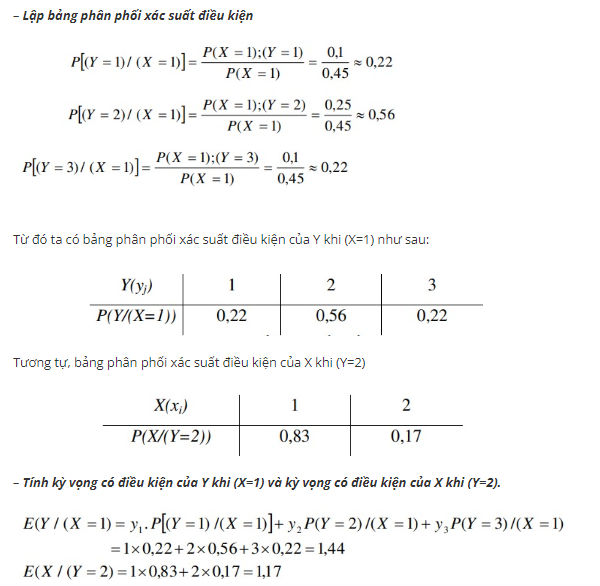

In [39]:
#f
print("Kỳ vọng có điều kiện 𝐸(𝑋|𝑌=3) = E(X, Y=3)/E(Y = 3) = ", 1*0.2 + 2*0.1 + 4*0.7)

print("Kỳ vọng có điều kiện 𝐸(𝑌|𝑋=4) = E(Y, X=4)/E(X = 4) = ", 2*0.3 + 3*0.7)

Kỳ vọng có điều kiện 𝐸(𝑋|𝑌=3) = E(X, Y=3)/E(Y = 3) =  3.1999999999999997
Kỳ vọng có điều kiện 𝐸(𝑌|𝑋=4) = E(Y, X=4)/E(X = 4) =  2.6999999999999997


### Bài 2. (phân bố chuẩn)
Cân nặng của sinh viên trong lớp là đại lượng ngẫu nhiên có phân bố chuẩn với kỳ vọng $60kg$ và độ lệch chuẩn $15kg$. <br>
- **a)** Hãy sinh ra một bảng dữ liệu của $X$ với kích thước $100.$ 
- **b)** Dùng thư viện thích hợp, trực quan dữ liệu trên. <br>
- **b)** Tính xác suất để sinh viên được chọn trong lớp nặng hơn $70kg$, xác suất để nhẹ hơn $40kg$. <br>
- **c)** Tìm $a$ sao cho xác suất để cân nặng của sinh viên không vượt quá $a$ thì bằng $0.75.$

In [55]:
#a
import numpy as np
import sympy as sp
kq = np.random.normal(loc = 60, scale = 15, size = 100)
print("sinh ra một bảng dữ liệu của  𝑋 với kích thước  100.\n",kq)

sinh ra một bảng dữ liệu của  𝑋 với kích thước  100.
 [69.07163974 62.3356187  54.84203436 45.87687944 67.60093293 33.67214347
 47.71741202 50.94732865 50.3131662  64.35953587 68.6216263  52.34426286
 52.83496162 46.36492643 79.33957996 37.88271506 59.51844341 53.89980218
 33.93532652 66.11299369 48.20742384 38.17355661 67.40768412 75.61456085
 42.24413811 64.73867267 51.46797954 61.77191176 53.06723508 72.19096023
 71.0094164  48.67762395 46.67439831 83.75321844 48.93936746 61.99683111
 61.53247913 56.62468507 55.29385724 69.59053839 85.56870969 48.14422155
 63.90072922 39.20215527 60.11815607 52.27378467 40.62537493 64.76992064
 47.57874905 53.32019162 64.11229261 68.59231038 62.03361559 86.9789103
 57.33216394 72.67998759 50.92125232 59.85457272 71.00111858 58.07210326
 94.23111578 66.23016281 29.9516164  56.82667714 42.15055482 52.62514862
 40.50716111 58.57717534 77.55528602 75.69073118 53.70414515 77.61127057
 64.54772778 65.5933243  58.40055683 49.94817871 64.46477537 69.3075963

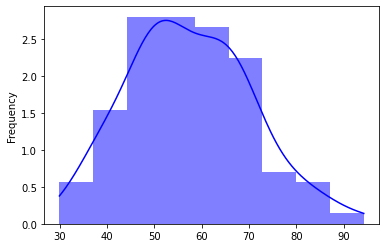

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(kq, color="blue", kde=True, stat="frequency", linewidth=0)
#hist = historgram = lược đồ
plt.show()

In [78]:
#c
import scipy.stats as st
print("Xác suất để nặng hơn 70kg", 1-st.norm.cdf(70, loc = 60, scale = 15))

print("Xác suất để nhẹ hơn 40kg", st.norm.cdf(40, loc = 60, scale = 15))

Xác suất để nặng hơn 70kg 0.2524925375469229
Xác suất để nhẹ hơn 40kg 0.09121121972586788


In [83]:
#d
a = st.norm.ppf(0.75, loc = 60, scale = 15)
print("Tìm  𝑎 sao cho xác suất để cân nặng của sinh viên không vượt quá  𝑎 thì bằng  0.75.:", a )

Tìm  𝑎 sao cho xác suất để cân nặng của sinh viên không vượt quá  𝑎 thì bằng  0.75.: 70.11734625294122


### Bài 3. (xấp xỉ phân bố bằng luật số lớn, định lý giới hạn trung tâm)
- **a)** Sĩ số tiêu chuẩn cho môt lớp ôn tâp̣ thi Đánh giá năng lực ĐHQG là 130 hoc sinh. Theo kinh nghiệm từ những đơṭ tuyển sinh trước, tỷ lệ nhập̣ học chính thứ so với tỷ lệ đăng ký là 45%. Do vậy, bộ phận tuyển sinh đã nhận đơn đăng ký của 300 học sinh, tính xác suất để lớp học bị vượt chuẩn sĩ số.
- **b)** Gieo một con xúc sắc có các mặt là $(1,1,3,4,5,7)$ đồng chất, tổng cộng $50$ lần. Tính xác suất để **tổng** số nút thu được là không vượt quá $200$? Là lớn hơn $120?$

In [89]:
#a
n = 300
p = 0.45
muy = n*p
sigma = math.sqrt(n*p*(1-p))
print(muy)
print(sigma)

z = (130 - 135) / sigma
print(z)
print("Xác suất để lớp học vượt chuẩn sĩ số là:", 1 - st.norm.cdf(z))

135.0
8.616843969807043
-0.5802588531856595
Xác suất để lớp học vượt chuẩn sĩ số là: 0.7191299646514954


### Bài 4. (biến ngẫu nhiên liên tục)
Cho biến ngẫu nhiên liên tục $X$ có hàm phân bố xác suất PMF sau đây
$$f_X(x)=\left\{ \begin{align}
  & k(x^2-4x) ,\text{   } 1 \le x \le 4 \\ 
 & 0,\text{    } \text{khác}. \\ 
\end{align} \right..$$
- **a)** Tìm $k$.
- **b)** Tìm hàm phân bố tích lũy CDF của $X$.
- **c)** Tính $E(X)$, $E(X^4)$ và $Std(X).$
- **d)** Tính $Var(\frac{2}{X}+3).$
- **e)** Tính $P(X \ge 1)$ và $P(X \ge 2 | X \le 3).$
- **f)** Tính $mode(X)$ và $median(X).$

### Bài 5. (phân phối kết hợp liên tục)
Cho vector ngẫu nhiên $(X,Y)$ có hàm mật độ sau 
$$f(x,y)=\left\{ \begin{aligned}
  & C \cdot e^{-2x-3y} \text{  khi  } x, y \ge 0 \\ 
 & 0\text{ otherwise} \\ 
\end{aligned} \right.$$
- **a)** Xác định $C$.
- **b)** Tìm hàm mật độ lề $f_X(x), f_Y(y).$ Từ đó kiểm tra tính độc lập của $X,Y.$
- **c)** Viết biểu thức cho các xác suất có điều kiện $f_{X|Y=2},$ $f_{Y|X = 3}.$
- **d)** Hãy viết biểu thức cho hàm phân phối tích lũy $F(x,y).$
- **e)** Tính các giá trị $P(-2 < Y < 2)$ và $P(-2 < X < 1| -2 < Y < 2).$
- **f)** Tính giá trị $P(X < Y)$ và $E(X|Y>1).$